# Chapter 15 로지스틱 회귀 분석을 통한 데이터 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    
def plot_scalar_field(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False, zorder=0):
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')

    fv = np.vectorize(f)
    
    # Make data.
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased, zorder=zorder)

## 15.1 실제 데이터에서 분류 함수 테스트하기

In [3]:
def bmw_finder(mileage,price):
    if price > 25000:
        return 1
    else:
        return 0

### 15.1.1 자동차 데이터 불러오기

In [4]:
from car_data import bmws, priuses

In [5]:
all_car_data = []
for bmw in bmws:
    all_car_data.append((bmw.mileage,bmw.price,1))
for prius in priuses:
    all_car_data.append((prius.mileage,prius.price,0))

In [6]:
all_car_data

[(93404.0, 13999.0, 1),
 (110890.0, 13995.0, 1),
 (94133.0, 13982.0, 1),
 (46778.0, 14599.0, 1),
 (53106.0, 22500.0, 1),
 (58761.0, 24998.0, 1),
 (108816.0, 24947.0, 1),
 (81100.0, 13995.0, 1),
 (90000.0, 8400.0, 1),
 (68613.0, 14995.0, 1),
 (94000.0, 11995.0, 1),
 (92500.0, 10995.0, 1),
 (112081.0, 11995.0, 1),
 (105121.0, 11500.0, 1),
 (92000.0, 2013.0, 1),
 (107953.0, 12999.0, 1),
 (56000.0, 18995.0, 1),
 (101191.0, 18900.0, 1),
 (64365.0, 16998.0, 1),
 (66000.0, 10000.0, 1),
 (76675.0, 12500.0, 1),
 (93015.0, 15995.0, 1),
 (80917.0, 14970.0, 1),
 (96000.0, 16795.0, 1),
 (70000.0, 12999.0, 1),
 (107000.0, 11950.0, 1),
 (78000.0, 18995.0, 1),
 (78000.0, 15000.0, 1),
 (92000.0, 2013.0, 1),
 (57624.0, 21963.0, 1),
 (77854.0, 16995.0, 1),
 (48310.0, 22998.0, 1),
 (51656.0, 20998.0, 1),
 (62410.0, 19991.0, 1),
 (39332.0, 29995.0, 1),
 (31420.0, 21000.0, 1),
 (41267.0, 22450.0, 1),
 (73000.0, 19999.0, 1),
 (94608.0, 11995.0, 1),
 (67000.0, 24964.0, 1),
 (50000.0, 18985.0, 1),
 (73601.0, 1

### 15.1.2 분류 함수 테스트하기

In [7]:
def test_classifier(classifier, data):
    trues = 0
    falses = 0
    for mileage, price, is_bmw in data:
        if classifier(mileage, price) == is_bmw: #1
            trues += 1
        else:
            falses += 1 #1
    return trues / (trues + falses)

In [8]:
test_classifier(bmw_finder, all_car_data)

0.59

### 15.1.3 연습문제

### 연습문제 15.1
`test_classifier`함수를 개선하여 참 양성, 참 응성, 거짓 양성, 거짓 음성의 개수를 출력하도록 하라. `bmw_finder` 분류기에 대해 이 값들을 출력해서 이 분류기의 성능을 논하라.

In [9]:
def test_classifier(classifier, data, verbose=False): #1
    true_positives = 0 #2
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for mileage, price, is_bmw in data:
        predicted = classifier(mileage,price)
        if predicted and is_bmw: #3
            true_positives += 1
        elif predicted:
            false_positives += 1
        elif is_bmw:
            false_negatives += 1
        else:
            true_negatives += 1
            
    if verbose:        
        print("true positives %f" % true_positives) #4
        print("true negatives %f" % true_negatives)
        print("false positives %f" % false_positives)
        print("false negatives %f" % false_negatives)
            
    return (true_positives + true_negatives) / len(data) #5

In [10]:
test_classifier(bmw_finder,all_car_data,verbose=True)

true positives 18.000000
true negatives 100.000000
false positives 0.000000
false negatives 82.000000


0.59

### 연습문제 15.2
`bmw_finder` 함수의 성능을 개선하고, `test_classifier` 함수로 개선한 `bmw_finder` 함수의 정확도가 59%보다 높음을 확인하라.

In [11]:
def bmw_finder2(mileage,price):
    if price > 20000:
        return 1
    else:
        return 0

In [12]:
test_classifier(bmw_finder2, all_car_data)

0.735

## 15.2 결정 경계 그리기

### 15.2.1 자동차 공간 그리기

In [13]:
def plot_data(ds):
    plt.scatter([d[0] for d in ds if d[2]==0],[d[1] for d in ds if d[2]==0],c='C1')
    plt.scatter([d[0] for d in ds if d[2]==1],[d[1] for d in ds if d[2]==1],c='C0',marker='x')
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

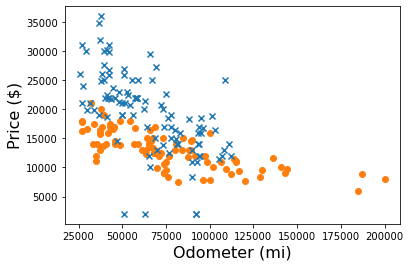

In [14]:
plot_data(all_car_data)

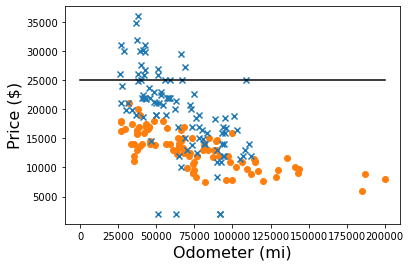

In [15]:
plot_data(all_car_data)
plot_function(lambda x: 25000, 0, 200000, c='k')

### 15.2.2 더 나은 결정 경계 그리기

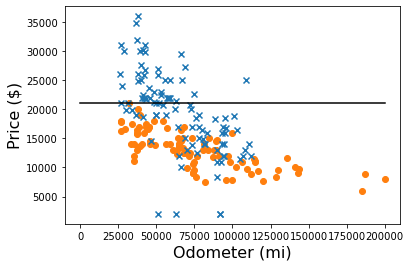

In [16]:
plot_data(all_car_data)
plot_function(lambda x: 21000, 0, 200000, c='k')

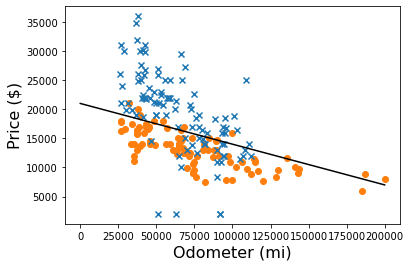

In [17]:
plot_data(all_car_data)
plot_function(lambda x: 21000 - 0.07 * x, 0, 200000, c='k')

### 15.2.3 분류 함수 구현하기

In [18]:
def decision_boundary_classify(mileage,price):
    if price > 21000 - 0.07 * mileage:
        return 1
    else:
        return 0

In [19]:
test_classifier(decision_boundary_classify, all_car_data)

0.805

### 15.2.4 연습문제

### 연습문제 15.3 (Mini-project)
`all_car_data` 데이터셋에서 최적의 분류 정확도를 도출하는 $p = (상수)$ 꼴의 결정 경계를 구하라.

In [20]:
def constant_price_classifier(cutoff_price):
    def c(x,p):
        if p > cutoff_price:
            return 1
        else:
            return 0
    return c

In [21]:
def cutoff_accuracy(cutoff_price):
    c = constant_price_classifier(cutoff_price)
    return test_classifier(c,all_car_data)

In [22]:
all_prices = [price for (mileage,price,is_bmw) in all_car_data]
max(all_prices,key=cutoff_accuracy)

17998.0

In [23]:
test_classifier(constant_price_classifier(17998.0), all_car_data)

0.795

## 15.3 회귀 문제로 분류 문제 표현하기

### 15.3.1 원본 자동차 데이터 스케일링하기

In [24]:
def make_scale(data):
    min_val = min(data) #1
    max_val = max(data)
    def scale(x): #2
        return (x-min_val) / (max_val - min_val)
    def unscale(y): #3
        return y * (max_val - min_val) + min_val
    return scale, unscale #4

price_scale, price_unscale = make_scale([x[1] for x in all_car_data]) #5
mileage_scale, mileage_unscale = make_scale([x[0] for x in all_car_data])

In [25]:
scaled_car_data = [(mileage_scale(mileage), price_scale(price), is_bmw) 
                    for mileage,price,is_bmw in all_car_data]

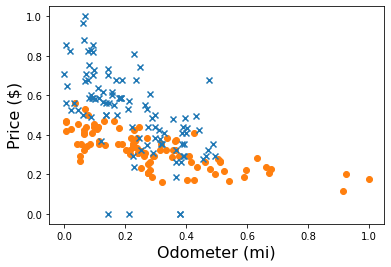

In [26]:
plot_data(scaled_car_data)

### 15.3.2 자동차의 BMW스러움을 측정하기

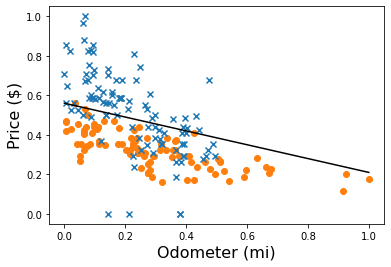

In [27]:
plot_data(scaled_car_data)
plot_function(lambda x: 0.56 - 0.35*x,0,1,c='k')

<Figure size 504x504 with 0 Axes>

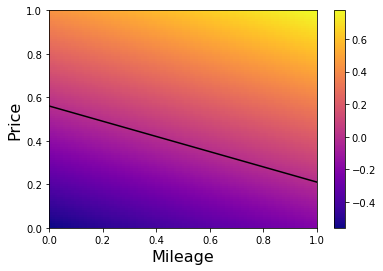

In [28]:
scalar_field_heatmap(lambda x,p: p + 0.35*x - 0.56, 0, 1,0,1)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

### 15.3.3 시그모이드 함수

In [29]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

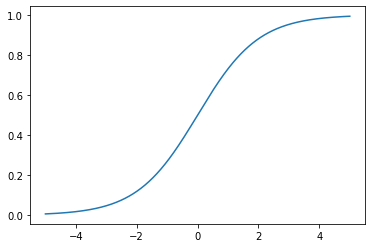

In [30]:
plot_function(sigmoid,-5,5)

### 15.3.4 다른 함수와 시그모이드 함수 합성하기

In [31]:
def f(x,p):
    return p + 0.35 * x - 0.56

def l(x,p):
    return sigmoid(f(x,p))

<Figure size 504x504 with 0 Axes>

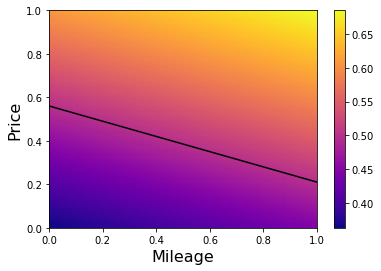

In [32]:
scalar_field_heatmap(l, 0, 1,0,1)
# plot_data(scaled_car_data,white=True)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Mileage', fontsize=16)
plot_function(lambda x: 0.56-0.35*x,0,1,c='k')

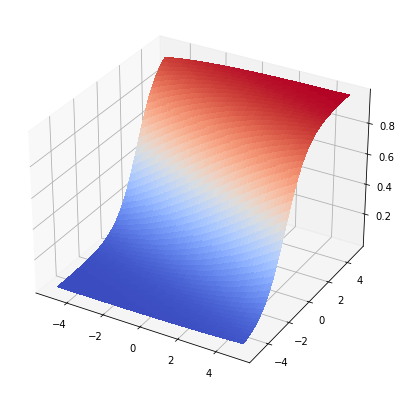

In [33]:
plot_scalar_field(l, -5, 5, -5, 5)

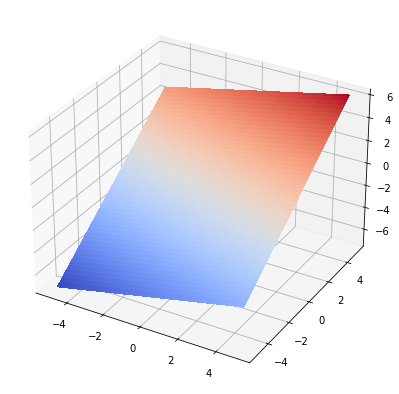

In [34]:
plot_scalar_field(f,-5,5,-5,5)

### 15.3.5 연습문제

### 연습문제 15.4
$x$가 큰 양수일 때 $h(x)$가 $0$에 가깝고, $x$가 절댓값이 큰 음수일 때 $h(x)$가 $1$에 가까우며, $h(3) = 0.5$인 함수 $h(x)$를 구하라.

#### 함수를 $y(x) = 3 - x$이라고 두면 $y(3) = 0$이다. $x$가 음수이고 절댓값이 커질 때, $y(x)$는 양의 무한대를 향하며 $x$가 양수이고 절댓값이 커질 때, $y(x)$는 음의 무한대를 향한다. 이는 $y(x)$의 결과를 시그모이드 함수에  대입해서 문제의 조건을 만족하는 함수를 만들 수 있음을 의미한다. 다시 말하면 $h(x) = \sigma(y(x)) = \sigma(3-x)$가 성립하며, 그래프는 다음과 같다.

### 연습문제 15.5 (Mini-project)
15.3.2절에서 정의한 함수 $f(x,p) = p - ax - b$는 실제로 최솟값이 존재한다. $x$(주행거리)와 $p$(가격)는 음수일 수 없기 때문이다. $f$의 최솟값을 특정하라. 필요하다면 $a = -0.35, b=0.56$라 두어라

#### 히트맵을 살펴보면 함수 $f(x,p)$는 왼쪽과 아래쪽으로 갈수록 함숫값이 작아진다. 이러한 성질은 식에서도 관찰할 수 있다. $x$나 $p$를 감소시키면 $f = p-ax-b = p+0.35 \cdot x - 0.56$의 값이 점점 줄어든다. 따라서 $f(x,p)$는 $(x,p) = (0,0)$일 때, 최솟값이 $f(0,0) = -0.53$으로 존재한다.

## 15.4 가능한 로지스틱 함수 살펴보기

### 15.4.1 로지스틱 함수 매개변수화하기

In [35]:
def make_logistic(a,b,c):
    def l(x,p):
        return sigmoid(a*x + b*p - c)
    return l

### 15.4.2 로지스틱 함수의 적합도 측정하기

In [36]:
def simple_logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [abs(is_bmw-l(x,p)) 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

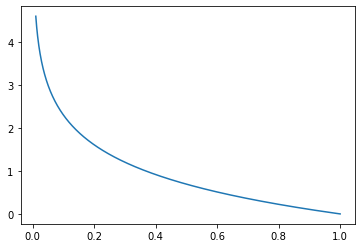

In [37]:
from math import log
plot_function(lambda x: -log(x),0.01,1)

In [38]:
-log(0.01)

4.605170185988091

In [39]:
-log(0.001)

6.907755278982137

In [40]:
def point_cost(l,x,p,is_bmw): #1
    wrong = 1 - is_bmw
    return -log(abs(wrong - l(x,p)))

def logistic_cost(a,b,c):
    l = make_logistic(a,b,c)
    errors = [point_cost(l,x,p,is_bmw) #2 
              for x,p,is_bmw in scaled_car_data]
    return sum(errors)

### 15.4.3 서로 다른 로지스틱 함수 테스트하기

In [41]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

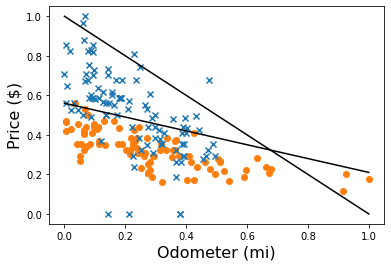

In [42]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56,)
plot_line(1,1,1)

In [43]:
logistic_cost(0.35,1,0.56)

130.92490748700456

In [44]:
logistic_cost(1,1,1)

135.56446830870456

### 15.4.4 연습문제

### 연습문제 15.6
15.4.3절에서 언급한 직선 $ax + by = c$를 $0 \leq x \leq$과 $0 \leq y \leq 1$ 범위에서 플로팅하는 함수 `plot_line(a,b,c)`를 구하라.

In [45]:
def plot_line(acoeff,bcoeff,ccoeff,**kwargs):
    a,b,c = acoeff, bcoeff, ccoeff
    
    # black by default
    if 'c' not in kwargs:
        kwargs['c'] = 'k'
        
    if b == 0:
        plt.plot([c/a,c/a],[0,1])
    else:
        def y(x):
            return (c-a*x)/b
        plt.plot([0,1],[y(0),y(1)],**kwargs)

### 연습문제 15.7
시그모이드 함수 $\sigma$의 식을 사용해 $\sigma(ax + by - c)$의 식을 작성하라.

#### 시그모이드 함수는 $\sigma(x) = \frac{1}{1+e^-x}$이므로 다음과 같이 쓰면 된다.
$$ \sigma(ax + by -c) = \frac{1}{e^{c-ax-by}} $$

### 연습문제 15.8 (Mini-project)
$k(x,y) = \sigma(x^2 + y^2 - 1)$의 그래프 모양을 설명하라. 이 함수의 결정 경계 $k(x,y) = 0.5$를 만족하는 점들의 집합의 모양을 설명하라.

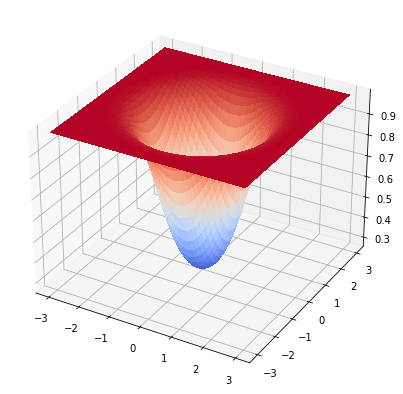

In [46]:
def k(x,y):
    return sigmoid(x**2 + y**2 - 1)
plot_scalar_field(k,-3,3,-3,3)

### 연습문제 15.9 (Mini-project)
두 방정식 $2x + y = 1, 4x + 2y = 2$는 같은 직선을 정의하며, 따라서 결정 경계도 같다. 그렇다면 두 로지스틱 함수 $\sigma(2x + y -1), \sigma(4x + 2y - 2)$는 서로 같은 함수인지 판단하라.

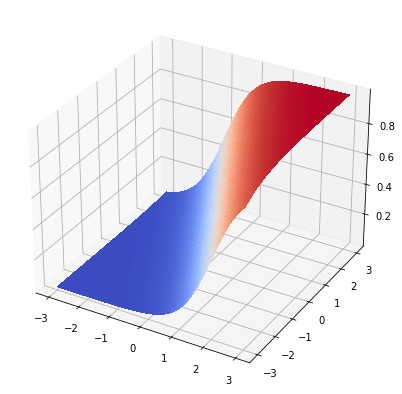

In [47]:
plot_scalar_field(lambda x,y:sigmoid(2*x+y-1),-3,3,-3,3)

### 연습문제 15.10 (Mini-project)
직선 $ax + by = c$가 주어지면 이 직선의 위쪽과 아래쪽을 파악하기란 쉽지 않다. 함수 $z(x,y) = ax + by - c$가 양수를 리턴하는 점이 직선의 어느 쪽에 있는지를 설명하는 방법을 구하라.

#### 직선 $ax + by = c$는 $z(x,y) = ax + by - c = 0$을 만조하는 점의 집합이다. 7장에서 살펴봤듯이 $z(x,y) = ax + by - c$의 그래프는 3차원 공간에서 평면을 나타낸다. 따라서 직선 위의 점에서 특정 방향으로 이동할 때 $z(x,y)$값이 증가했다면 반대 방향으로 이동할 때 $z(x,y)$값이 감소한다. $z(x,y)$의 그라디언트는 $\nabla z(x,y) = (a,b)$이며, 벡터 $(a,b)$가 나타내는 방향으로 갈 때, $z(x,y)$가 가장 가파르게 증가함을 의미한다. 따라서 $(-a,-b)$ 방향으로 가면 $z(x,y)$가 가장 가파르게 감소한다. 두 방향 모두 직선이 뻗어나가는 방향과는 수직이다.

## 15.5 최적합 로지스틱 함수 찾기

### 15.5.1 3차원에서 경사하강법

In [48]:
from math import sqrt
def length(v):
    return sqrt(sum([vi*vi for vi in v]))

def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

In [49]:
def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)

In [50]:
def approx_gradient3(f,x0,y0,z0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0,z0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y,z0),y0,dx=dx)
    partial_z = approx_derivative(lambda z:f(x0,y0,z),z0,dx=dx)
    return (partial_x,partial_y,partial_z)

In [51]:
def gradient_descent3(f,xstart,ystart,zstart,
                      tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    return x,y,z

### 15.5.2 경사하강법으로 최적합 로지스틱 함수 찾기

In [52]:
gradient_descent3(logistic_cost,1,1,1,max_steps=100)

(0.21114493546399946, 5.04543972557848, 2.1260122558655405)

In [53]:
gradient_descent3(logistic_cost,1,1,1,max_steps=200)

(0.884571531298388, 6.657543188981642, 2.955057286988365)

To make a cool graph of the decision boundary moving as gradient descent runs:

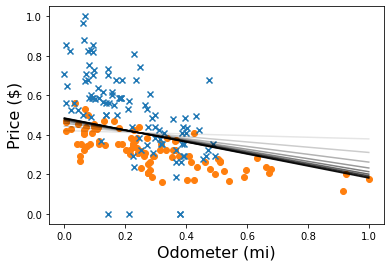

In [54]:
plot_data(scaled_car_data)
for i in range(0,1000,100):
    a,b,c = gradient_descent3(logistic_cost,1,1,1,max_steps=i)
    plot_line(a,b,c,alpha=i/1000,c='k')

In [55]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

(3.7167003153580045, 11.422062409195114, 5.596878367305919)

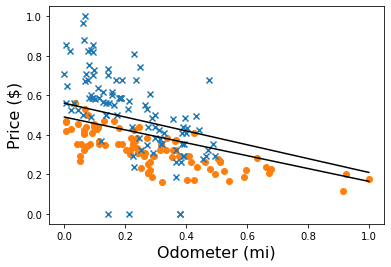

In [56]:
plot_data(scaled_car_data)
plot_line(0.35,1,0.56)
plot_line(3.7167003153580045, 11.422062409195114, 5.596878367305919)

### 15.5.3 최적합 로지스틱 분류기 테스트하고 이해하기

In [57]:
def best_logistic_classifier(x,p):
    l = make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919)
    if l(x,p) > 0.5:
        return 1
    else:
        return 0

In [58]:
test_classifier(best_logistic_classifier,scaled_car_data)

0.8

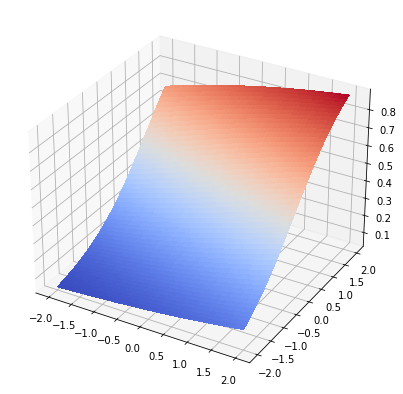

In [59]:
plot_scalar_field(make_logistic(0.35,1,0.56), -2, 2, -2, 2)

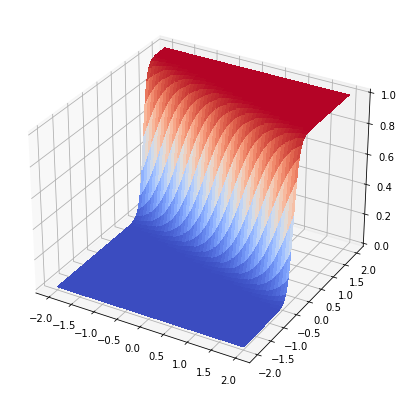

In [60]:
plot_scalar_field(make_logistic(3.7167003153580045, 11.422062409195114, 5.596878367305919), -2, 2, -2, 2)

### 15.5.4 연습문제

### 연습문제 15.11
`gradient_descent3`함수를 수정해서 결과를 출력하기 전에 수행된 단계의 총 개수를 출력하게 만들어라. `logistic_cost`에 대해 경사하강법이 수렴하는 데 몇 단계나 필요한지 구하라.

In [61]:
def gradient_descent3(f,xstart,ystart,zstart,tolerance=1e-6,max_steps=1000):
    x = xstart
    y = ystart
    z = zstart
    grad = approx_gradient3(f,x,y,z)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        z -= 0.01 * grad[2]
        grad = approx_gradient3(f,x,y,z)
        steps += 1
    print(steps)
    return x,y,z

In [62]:
gradient_descent3(logistic_cost,1,1,1,max_steps=8000)

7244


(3.7167003153580045, 11.422062409195114, 5.596878367305919)

### 연습문제 15.12 (Mini-project)
임의 차원의 벡터를 입력으로 받는 함수의 그라디언트를 계산하는 `approx_gradient` 함수를 작성하라. 이후, 임의 차원에서 동작하는 `gradient_descent` 함수를 작성하라. `gradient_descent`를 테스트하고자 $f(x_1, x_2, \dots, x_n) = (x_1 - 1)^2 + (x_2 - 1)^2 + \cdots + (x_n - 1)^2$과 같은 $n$차원 함수를 사용해볼 수 있다. 이때, $x_1, x_2, \dots, x_n$은 함수 $f$에 입력하는 $n$개의 변수이다. 이 함수의 최솟값은 모든 성분이 수 1로 되어 있는 $n$차원 벡터 $(1, 1, \dots, 1)$이다.

In [63]:
def partial_derivative(f,i,v,**kwargs):
    def cross_section(x):
        arg = [(vj if j != i else x) for j,vj in enumerate(v)]
        return f(*arg)
    return approx_derivative(cross_section, v[i], **kwargs)

In [64]:
def approx_gradient(f,v,dx=1e-6):
    return [partial_derivative(f,i,v) for i in range(0,len(v))]

In [65]:
def gradient_descent(f,vstart,tolerance=1e-6,max_steps=1000):
    v = vstart
    grad = approx_gradient(f,v)
    steps = 0
    while length(grad) > tolerance and steps < max_steps:
        v = [(vi - 0.01 * dvi) for vi,dvi in zip(v,grad)]
        grad = approx_gradient(f,v)
        steps += 1
    return v

In [66]:
def sum_squares(*v):
    return sum([(x-1)**2 for x in v])

In [67]:
v = [2,2,2,2,2]
gradient_descent(sum_squares,v)

[1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137,
 1.0000002235452137]

### 연습문제 15.13 (Mini-project)
15.4.2절에 등장한 비용 함수 `simple_logistic_cost`에 대해 경사하강법을 실행해보고 어떤 일이 벌어지는지 설명하라.

#### 이 함수에 대해 경사하강법을 실행하면 수렴하지 않는 것처럼 보인다. 결정 경계가 수렴해도 $a, b, c$값이 한도 끝도 없이 계속 증가하기 때문이다. 경사하강법이 더 많은 로지스틱 함수를 탐색하는 과정에서 같은 방향의 직선이지만 로지스틱 함수가 무한히 가팔라지는 상황임을 의미한다. 이러한 상황은 경사하강법이 대부분의 점에 피팅하도록 유인하면서도 이미 잘못 분류된 점을 무시하기 때문에 발생한다. 앞에서 언급했듯이 로지스틱 함수가 가장 높은 확신 정도를 갖는 데이터 포인트가 사실은 부정확하게 분류된다면, 이 상황에 패널티를 부여해 해결할 수 있다. 우리가 만든 `logistic_cost`함수는 이런 식으로 패널티를 부여하기 때문에 잘 동작한다.